## Testing tuning hyperparameters
<br>
Found this example on Kaggle and decided to test the concept of tuning hyperparameters.
<br>
<br>
(https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost) 
<br>
<br>
Usually this is best for cases where you have many features, but in this case I will test the concept and get a feel for how to configure the classifier in this case.

In [20]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train = train[train.columns[1:]]
test = test[test.columns[1:]]
test.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [6]:
features = train.columns[2:]
target = ['Survived']
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [15]:
# Estimate model using training data
xgboost = XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

In [21]:
# Cross-validation
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7875     0.8375     0.8125     0.8375     0.9375     0.85
 0.84615385 0.87179487 0.75641026 0.88461538]
Mean: 0.8421474358974359
Standard Deviation: 0.04807462601350047


In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  7],
       [10, 26]])

In [7]:
# Calculate precision, recall, and f-score
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8281139755766621, 0.83, 0.8282509127115831, None)

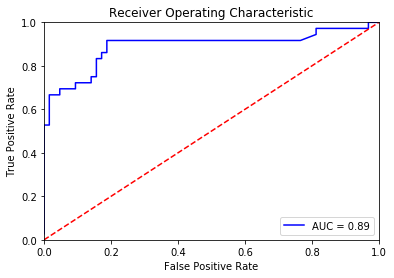

In [10]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# And plot using matplotlib
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()